In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers,models,datasets,optimizers,losses,metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


In [4]:
TenDayAverage = models.Sequential()
TenDayAverage.add(layers.Dense(128,activation='relu',input_shape=(1,50)))
TenDayAverage.add(layers.Dense(64,activation='relu'))
TenDayAverage.add(layers.Dense(32,activation='relu'))
TenDayAverage.add(layers.Dense(1,activation='relu'))
TenDayAverage.compile(optimizer=optimizers.Adam(learning_rate=1e-7),loss='MeanSquaredError',metrics=['MeanAbsoluteError'])

In [5]:
TenDayAverage.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 1, 128)              │           6,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1, 64)               │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1, 32)               │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1, 1)                │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,897 (66.00 KB)

 Trainable params: 16,897 (66.00 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
HundredDayAverage = models.Sequential()
HundredDayAverage.add(layers.Dense(256,activation='relu',input_shape=(1,500)))
HundredDayAverage.add(layers.Dense(256,activation='relu'))
HundredDayAverage.add(layers.Dense(128,activation='relu'))
HundredDayAverage.add(layers.Dense(1,activation='relu'))
HundredDayAverage.compile(optimizer=optimizers.Adam(learning_rate=1e-7),loss='MeanSquaredError',metrics=['MeanAbsoluteError'])

In [51]:
HundredDayAverage.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 1, 256)              │         128,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1, 256)              │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 1, 128)              │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1, 1)                │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 227,073 (887.00 KB)

 Trainable params: 227,073 (887.00 KB)

 Non-trainable params: 0 (0.00 B)

Training for the 10 day moving Avegage


In [52]:
df = pd.read_csv('/content/MSFT_data.csv')

In [53]:
# copying the data
data_min_max_scaled = df.copy()

# applying normalization techniques
for column in data_min_max_scaled.columns:
  if column in ['Volume']:
    data_min_max_scaled[column] = (data_min_max_scaled[column] - data_min_max_scaled[column].min()) / (data_min_max_scaled[column].max() - data_min_max_scaled[column].min())

In [54]:
df = data_min_max_scaled

In [55]:
arr = np.array(df.drop(columns=['Label','TEN','HUNDREAD']))

In [56]:
len(arr)

6037

In [57]:
data = []
temp = []
for i in range(0,len(arr)-100):
  for j in range(0,100):
    temp.append(arr[i+j])
  data.append(temp)
  temp = []
data_Arr = np.array(data)

In [58]:
np.shape(data_Arr)

(5937, 100, 5)

In [59]:
data_Val = np.array(df['HUNDREAD'])

In [60]:
data_Val = data_Val[100:]

In [61]:
np.shape(data_Val)

(5937,)

In [62]:
data = data_Arr.reshape(5937,1,500)

In [63]:
value = data_Val.reshape(5937,1,1)

In [64]:
HundredDayAverage.fit(data,value,epochs=100)

Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - MeanAbsoluteError: 70.6779 - loss: 12607.2607
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - MeanAbsoluteError: 70.0799 - loss: 12423.6211
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - MeanAbsoluteError: 70.4335 - loss: 12560.6973
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - MeanAbsoluteError: 67.8317 - loss: 11745.0410
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - MeanAbsoluteError: 64.6100 - loss: 10628.5605
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - MeanAbsoluteError: 55.9087 - loss: 7991.1538
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - MeanAbsoluteError: 48.5095 - loss: 6014.8418
Epoch 8/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - MeanAbsoluteError: 43.5671 - loss: 4818.1548
Epoch 9/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - MeanAbsoluteError: 39.4334 - loss: 4000.0706
Epoch 10/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - MeanAbsoluteError: 35.1880 - 

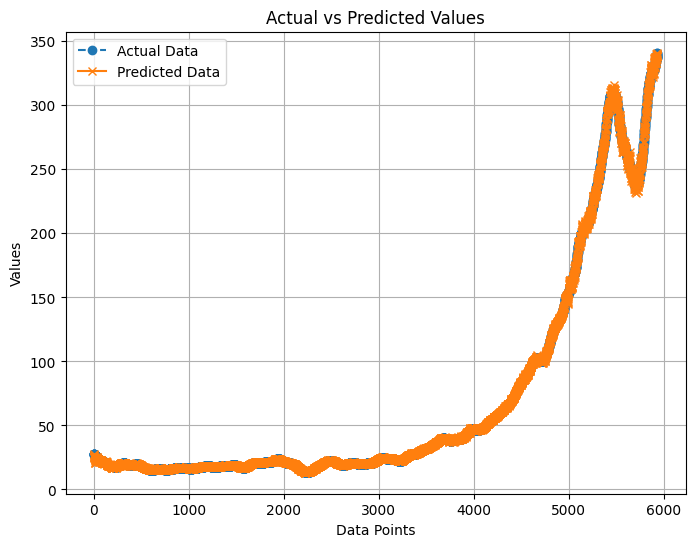

In [176]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(plotVal, label='Actual Data', marker='o', linestyle='--')
plt.plot(plotPred, label='Predicted Data', marker='x', linestyle='-')

# Add labels and legend
plt.title('Actual vs Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [241]:
data1 = pd.read_csv('/content/JNJ_data.csv')

In [242]:
# copying the data
data_min_max_scaled = data1.copy()

# applying normalization techniques
for column in data_min_max_scaled.columns:
  if column in ['Volume','Open','High','Low','Close']:
    data_min_max_scaled[column] = (data_min_max_scaled[column] - data_min_max_scaled[column].min()) / (data_min_max_scaled[column].max() - data_min_max_scaled[column].min())

In [243]:
data1 = data_min_max_scaled

In [244]:
arr1 = np.array(data1.drop(columns=['Label','TEN','HUNDREAD']))

In [ ]:
arr1

array([[0.00301846, 0.0032685 , 0.00293223, 0.00327726, 0.06917771],
       [0.00314759, 0.00319734, 0.002913  , 0.00291635, 0.06601192],
       [0.00297542, 0.00319496, 0.0029827 , 0.00297371, 0.101962  ],
       ...,
       [0.97204572, 0.96931102, 0.96997062, 0.97493819, 0.00324962],
       [0.98038657, 0.97512801, 0.98053944, 0.97711103, 0.00135201],
       [0.97917323, 0.97382407, 0.97322252, 0.9718055 , 0.0025117 ]])

In [245]:
data = []
temp = []
for i in range(0,len(arr1)-100):
  for j in range(0,100):
    temp.append(arr1[i+j])
  data.append(temp)
  temp = []
data_Arr1 = np.array(data)

In [182]:
np.shape(data_Arr1)

(5937, 100, 5)

In [183]:
data_Val1 = np.array(data1['HUNDREAD'])

In [184]:
data_Val1 = data_Val1[100:]

In [185]:
np.shape(data_Val1)

(5937,)

In [188]:
data1= data_Arr1.reshape(5937,1,500)

In [189]:
value1= data_Val1.reshape(5937,1,1)

In [191]:
HundredDayAverage.fit(data1,value1,epochs=50)

Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - MeanAbsoluteError: 69.5872 - loss: 6695.0620
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - MeanAbsoluteError: 69.4811 - loss: 6690.6299
Epoch 3/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - MeanAbsoluteError: 68.6435 - loss: 6567.6479
Epoch 4/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - MeanAbsoluteError: 69.6605 - loss: 6715.4321
Epoch 5/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - MeanAbsoluteError: 69.6419 - loss: 6716.7788
Epoch 6/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - MeanAbsoluteError: 69.4217 - loss: 6716.2339
Epoch 7/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - MeanAbsoluteError: 70.3055 - loss: 6836.3145
Epoch 8/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - MeanAbsoluteError: 69.8477 - loss: 6773.8687
Epoch 9/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - MeanAbsoluteError: 68.6781 - loss: 6540.7642
Epoch 10/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - MeanAbsoluteError: 69.7320 - loss: 6714.2856
Epoch 11/

In [25]:
data2 = pd.read_csv('/content/NVDA_data.csv')

In [26]:
# copying the data
data_min_max_scaled = data2.copy()

# applying normalization techniques
for column in data_min_max_scaled.columns:
  if column in ['Volume','Open','High','Low','Close']:
    data_min_max_scaled[column] = (data_min_max_scaled[column] - data_min_max_scaled[column].min()) / (data_min_max_scaled[column].max() - data_min_max_scaled[column].min())

In [27]:
data2 = data_min_max_scaled

In [28]:
arr2 = np.array(data2.drop(columns=['Label','TEN','HUNDREAD']))

In [29]:
data = []
temp = []
for i in range(0,len(arr2)-100):
  for j in range(0,100):
    temp.append(arr2[i+j])
  data.append(temp)
  temp = []
data_Arr2 = np.array(data)

In [30]:
np.shape(data_Arr2)

(5937, 100, 5)

In [31]:
data_Val2 = np.array(data2['HUNDREAD'])

In [32]:
data_Val2 = data_Val2[100:]

In [33]:
np.shape(data_Val2)

(5937,)

In [34]:
data2= data_Arr2.reshape(5937,1,500)

In [35]:
value2= data_Val2.reshape(5937,1,1)

In [36]:
HundredDayAverage.fit(data2,value2,epochs=100)

Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - MeanAbsoluteError: 3.9994 - loss: 80.2724
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - MeanAbsoluteError: 4.0046 - loss: 80.1809
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - MeanAbsoluteError: 4.1301 - loss: 86.1800
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - MeanAbsoluteError: 4.1600 - loss: 86.3253
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - MeanAbsoluteError: 4.0772 - loss: 80.7100
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - MeanAbsoluteError: 3.9000 - loss: 77.3165
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - MeanAbsoluteError: 4.1626 - loss: 86.5259
Epoch 8/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - MeanAbsoluteError: 3.9382 - loss: 79.5798
Epoch 9/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - MeanAbsoluteError: 3.9580 - loss: 75.5708
Epoch 10/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - MeanAbsoluteError: 3.7863 - loss: 76.5291
Epoch 11/100
186/1

In [37]:
dataUltimateTest = pd.read_csv('/content/META_data.csv')

In [ ]:
dataUltimateTest

,Open,High,Low,Close,Volume,Label,TEN,HUNDREAD
0,41.889981,44.828756,37.855394,38.084518,573576400,0,0.000000,0.000000
1,36.390988,36.520494,32.874422,33.900501,168192700,0,0.000000,0.000000
2,32.485906,33.462177,30.822261,30.882032,101786600,0,0.000000,0.000000
3,31.250627,32.376326,31.240665,31.878229,73600000,0,0.000000,0.000000
4,32.824615,33.083624,31.649105,32.904308,50237200,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2918,354.226865,355.840726,349.883471,352.045227,11764200,0,340.107813,312.545506
2919,353.639131,355.621579,352.105013,353.479736,9898600,1,343.051569,312.945168
2920,354.715011,357.633853,353.957893,356.468292,13207900,0,345.403583,313.385465
2921,358.331174,360.522784,356.448352,356.956421,11798800,1,347.752606,313.854860


In [38]:
# copying the data
data_min_max_scaled = dataUltimateTest.copy()

# applying normalization techniques
for column in data_min_max_scaled.columns:
  if column in ['Volume','Open','High','Low','Close']:
    data_min_max_scaled[column] = (data_min_max_scaled[column] - data_min_max_scaled[column].min()) / (data_min_max_scaled[column].max() - data_min_max_scaled[column].min())

In [39]:
dataUltimateTest = data_min_max_scaled

In [40]:
ultimateArr = np.array(dataUltimateTest.drop(columns=['Label','TEN','HUNDREAD']))

In [41]:
data = []
temp = []
for i in range(0,len(ultimateArr)-100):
  for j in range(0,100):
    temp.append(ultimateArr[i+j])
  data.append(temp)
  temp = []
data_Arr_Test = np.array(data)

In [42]:
np.shape(data_Arr_Test)

(2823, 100, 5)

In [43]:
data_Val_Test = np.array(dataUltimateTest['HUNDREAD'])

In [44]:
data_Val_Test = data_Val_Test[100:]

In [45]:
np.shape(data_Val_Test)

(2823,)

In [46]:
dataTest= data_Arr_Test.reshape(2823,1,500)

In [47]:
valueTest= data_Val_Test.reshape(2823,1,1)

In [218]:
HundredDayAverage.fit(dataTest,valueTest,epochs=100)

Epoch 1/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - MeanAbsoluteError: 154.1654 - loss: 30795.7070
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - MeanAbsoluteError: 153.4086 - loss: 30903.9902
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - MeanAbsoluteError: 155.7209 - loss: 31475.7363
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - MeanAbsoluteError: 156.7127 - loss: 31688.1562
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - MeanAbsoluteError: 154.1417 - loss: 31212.9434
Epoch 6/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - MeanAbsoluteError: 155.4548 - loss: 31468.6660
Epoch 7/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - MeanAbsoluteError: 154.1278 - loss: 31129.4590
Epoch 8/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - MeanAbsoluteError: 155.4326 - loss: 31483.5312
Epoch 9/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - MeanAbsoluteError: 155.0399 - loss: 31148.6738
Epoch 10/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - MeanAbsoluteError: 154.3264 - loss: 30804.77

KeyboardInterrupt: 

In [ ]:
plotPred = []
for i in range(len(prediction)):
  plotPred.append(prediction[i][0][0])
plotVal = []
for i in range(len(valueTest)):
  plotVal.append(valueTest[i][0][0])

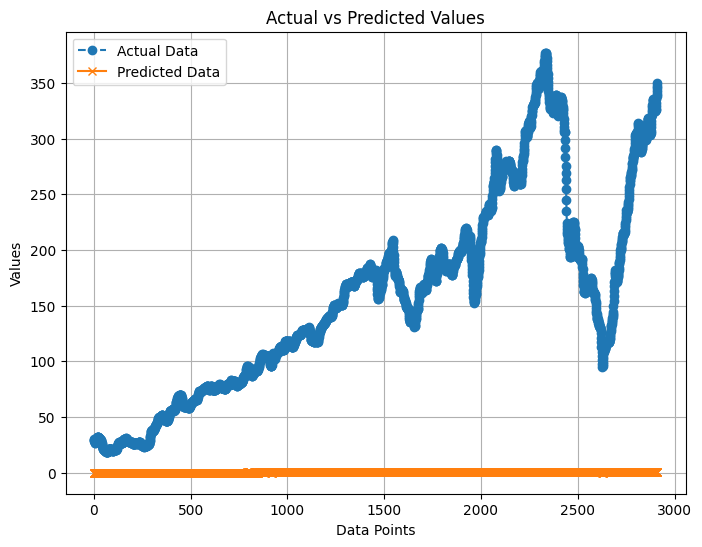

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(plotVal, label='Actual Data', marker='o', linestyle='--')
plt.plot(plotPred, label='Predicted Data', marker='x', linestyle='-')

# Add labels and legend
plt.title('Actual vs Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
